#**Hito 2.** Análisis de canciones: Lo que suena vs. lo que dice
##Proyecto Minería de Datos.
Integrantes (grupo 2): 
- Benjamín Aguilar.
- Benjamín Alvial. 
- Diego Carmona. 
- Jules Fredes C. 
- Diego Reyes.



Para esta versión del informe se han recogido aspectos de la retroalimentación, como: describir más la utilidad del estudio del problema, considerar clustering como técnica para estudiar géneros.

**Feedback de Hito 1** (Borrar esto)

Primero que todo, no sé si subieron una versión incorrecta del informe o si esta es la final, pues respecto a lo mostrado en el video, difiere bastante. Respecto a la presentación misma, me gustó bastante la motivación y contexto presentado. En relación al análisis exploratorio, quizás me habría tenido un poco más en mirar los resultados. Por ejemplo, en la matriz donde ven distribuciones, podrían haber comentado un poco más, pues tenían tiempo. Además, creo que gastar tiempo en explicar la definición de cada variables del dataset, hace que gasten mucho tiempo en eso, lo cual podrían haber invertido en lo mencionado anteriormente. En estos casos, basta con comentar de manera general lo que tienen los atributos en lugar de describir uno por uno, a menos que haya alguno que sea vital. Usualmente, para la categoría a predecir, se describe un poquito más. Respecto a las preguntas, me parecen bastante acordes pero tengo algunas recomendaciones. Primero, si ven que hay más canciones en las últimas décadas, hay que tener cuidado con el desbalance de datos. Además, como tienen un rango bastante grande, tal vez la predicción podría ser por décadas en lugar del año mismo (a menos que consideren una regresión para el problema). Para el caso de los géneros, no sé si solo los géneros que mostraron en el video o si hay más. Si es que hay más, una recomendación, sería: tratar de agrupar ciertos géneros a "mano". Por ejemplo, si hay diferentes variaciones de rock, agruparlos en uno. O también tomar los top X géneros más populares para ver si se pueden predecir. Creo que también sería llamativo aplicar clustering sobre los datos para ver si tienden agruparse naturalmente por género y/o año.

##1. Introducción


La música es una vía de expresión del ser humano y nunca ha dejado de estar presente. Es uno de los mayores mercados a nivel mundial, por lo cual da abundante espacio al estudio y análisis de ésta, ya que se puede estudiar el objeto como tal, además de la teoría ya existente.

Además, el ser humano se dedica a clasificar lo que sea que exista, incluyendo la música. Por ello, es interesante estudiar la categorización que el mismo ser humano ha creado - el género. Es común pensar que las canciones se definen en términos de género por la forma en que suenan más que de lo que hablan. Por lo tanto, se puede estudiar si esta hipótesis es certera, analizando aspectos técnicos para el sonido y las letras de las canciones para los temas de los que tratan.

La utilidad del estudio de la clasificación de las canciones recae en los algoritmos de recomendación. A su vez, estos pueden ser útiles para distintos propósitos:

- ???,
- Encontrar canciones similares a otras para integrar la banda sonora en una película o serie.
- Generación automática de listas de reproducción.

##2. Exploración de datos

###Sobre el conjunto de datos

Los datos a estudiar comprenden canciones creadas de los últimos setenta años y que están presentes en la plataforma de reproducción de música Spotify. Cada canción tiene atributos técnicos y además atributos que representan emocionalidad, como las letras de las canciones. Por lo tanto, se busca estudiar dos relaciones: periodo de tiempo y estos atributos, y, género y estos atributos.

El conjunto de datos se encuentra disponible en:
https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019  

(código y cosas)

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [2]:
import pandas as pd 
df = pd.read_csv('gdrive/MyDrive/Primavera 2022/tcc_ceds_music.csv')
df_real = df[['Unnamed: 0', 'track_name', 'release_date', 'genre', 'lyrics', 'len', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']]

FileNotFoundError: [Errno 2] No such file or directory: 'gdrive/MyDrive/Primavera 2022/tcc_ceds_music.csv'

El conjunto de datos, filtrado para el propósito del proyecto, tiene un total de 28.372 canciones, desde el 1950 al 2019. Para cada una de ellas, se tienen



*   Atributos tipo string: 'track_name' (nombre), 'genre' (género), 'lyrics' (letra).
*   Atributos numéricos: 'release_date' (año), 'len' (duración), 'danceability' (bailiabilidad), 'volumen' (volumen), 'acousticness' (acústica), 'instrumentalness' (instrumentalidad), 'valence' (valencia), 'energy' (energía). 

No hay valores nulos.

In [3]:
df_real.shape

NameError: name 'df_real' is not defined

In [ ]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        28372 non-null  int64  
 1   track_name        28372 non-null  object 
 2   release_date      28372 non-null  int64  
 3   genre             28372 non-null  object 
 4   lyrics            28372 non-null  object 
 5   len               28372 non-null  int64  
 6   danceability      28372 non-null  float64
 7   loudness          28372 non-null  float64
 8   acousticness      28372 non-null  float64
 9   instrumentalness  28372 non-null  float64
 10  valence           28372 non-null  float64
 11  energy            28372 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 2.6+ MB


Las dos variables principales a analizar son el año y el género, que se intentarán relacionar con la letra y con los atributos técnicos.

In [ ]:
df_real.head()

Unnamed: 0            track_name  release_date genre  \
0           0  mohabbat bhi jhoothi          1950   pop   
1           4             i believe          1950   pop   
2           6                   cry          1950   pop   
3          10              patricia          1950   pop   
4          12    apopse eida oneiro          1950   pop   

                                              lyrics  len  danceability  \
0  hold time feel break feel untrue convince spea...   95      0.357739   
1  believe drop rain fall grow believe darkest ni...   51      0.331745   
2  sweetheart send letter goodbye secret feel bet...   24      0.456298   
3  kiss lips want stroll charm mambo chacha merin...   54      0.686992   
4  till darling till matter know till dream live ...   48      0.291671   

   loudness  acousticness  instrumentalness   valence    energy  
0  0.454119      0.997992          0.901822  0.339448  0.137110  
1  0.647540      0.954819          0.000002  0.325021  0.263240  
2  0.585288      0.840361          0.000000  0.351814  0.139112  
3  0.744404      0.083935          0.199393  0.775350  0.743736  
4  0.646489      0.975904          0.000246  0.597073  0.394375

Además, se puede ver que las 10 palabras más comunes en las letras, independiente de género o año, son las siguientes.

In [ ]:
print(pd.Series(' '.join(df_real['lyrics']).split()).value_counts()[:10])
letras = df_real['lyrics']

know     33526
like     29649
time     26504
come     23619
go       17032
feel     16795
yeah     16787
away     16773
heart    16737
life     15906
dtype: int64


###Análisis temporal

La distribución de las canciones por año es como se muestra a continuación. Se tendrá que tener cuidado con manejar las canciones antes de los años 60 (clases desbalanceadas).

Text(0.5, 1.0, 'Año de salida')

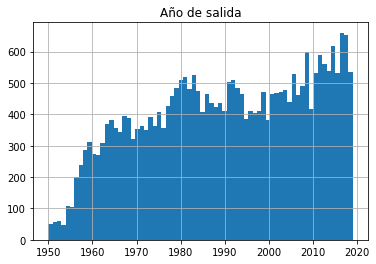

In [ ]:
import matplotlib.pyplot as plt
max = df_real['release_date'].max()
min = df_real['release_date'].min()
plt.subplot(1,1,1)
df_release=df_real['release_date']
df_release.hist(bins=max-min+1)
plt.title("Año de salida")

A priori se ve que con el tiempo las canciones han aumentado su duración, volumen energía y disminuido su acústica, pero es difícil analizar cuando las clases están muy desbalanceadas (pocos datos en años tempranos).

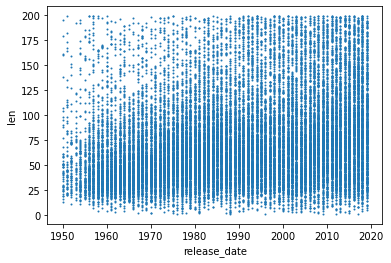

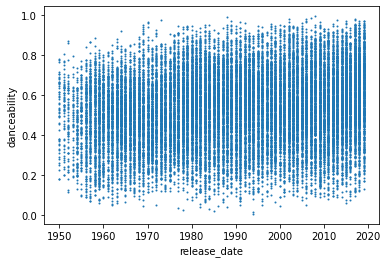

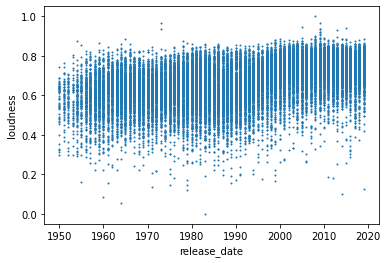

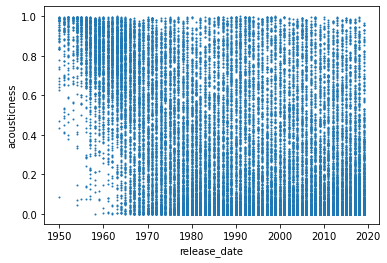

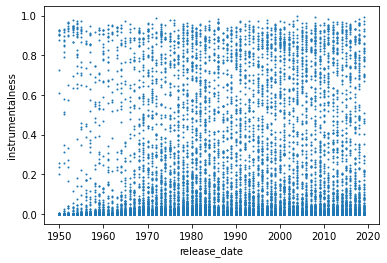

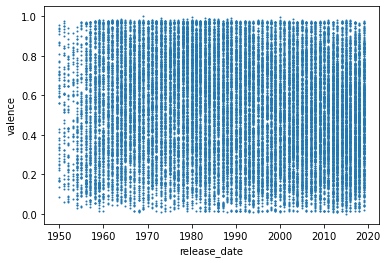

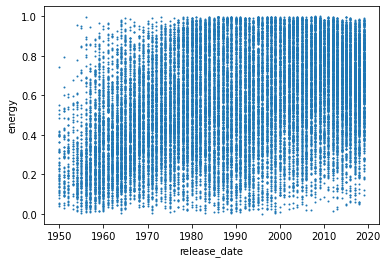

In [ ]:
for aspecto in ['len', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']:
  df_real.plot.scatter(x='release_date', y=aspecto, s=1)

No se ve una tendencia muy clara en palabras utilizadas en cada década, ni tampoco cuando se desagrega por año.

In [ ]:
for i in range(1950, 2010, 10):
  print(i, '...')
  copy = df_real[(df_real.release_date>=i) & (df_real.release_date<=i+9)]
  print(pd.Series(' '.join(copy['lyrics']).split()).value_counts()[1:5])
  print('---')

1950 ...
heart    1078
like     1004
come      956
time      932
dtype: int64
---
1960 ...
time     2557
come     2476
heart    2335
like     2191
dtype: int64
---
1970 ...
time    3915
come    3155
like    2856
go      2646
dtype: int64
---
1980 ...
time     4493
like     4151
come     3770
heart    3587
dtype: int64
---
1990 ...
like    4715
time    4276
come    3905
feel    2764
dtype: int64
---
2000 ...
like    5844
time    4707
come    4207
away    3251
dtype: int64
---


###Análisis de género

La distribución de las canciones por género es como se muestra a continuación. Es algo que se debe tener en cuenta, pues las clases no están del todo balanceadas.

Text(0.5, 0.98, 'Cantidad de canciones por género')

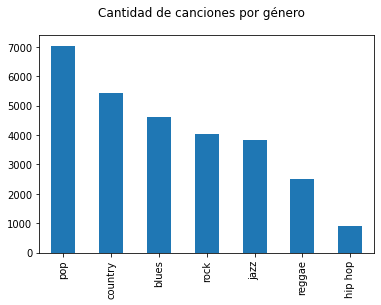

In [ ]:
fig, ax = plt.subplots()
df_real['genre'].value_counts().plot(ax=ax, kind='bar')
fig.suptitle("Cantidad de canciones por género")

Con respecto al género relacionado con los ámbitos técnicos, a priori no se visualizan relaciones concretas. Es posible, sin embargo, que la agregación de todos los aspectos sí den indicios de uno u otro género.

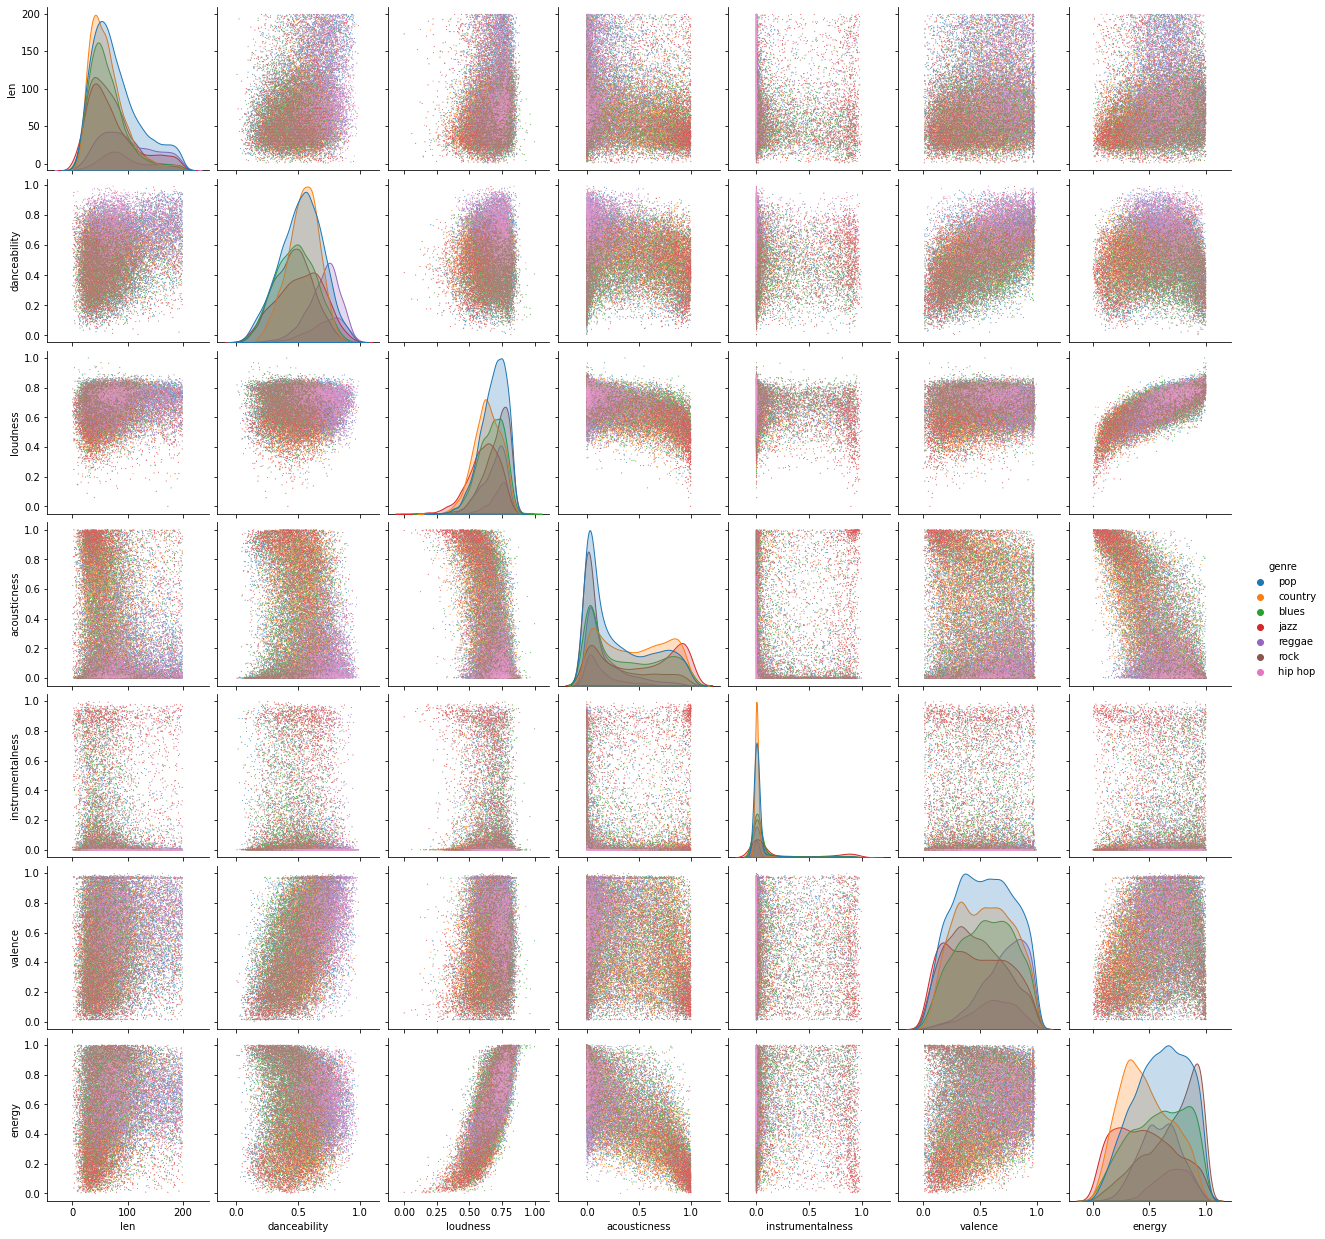

In [ ]:
import seaborn as sns
sns.pairplot(df_real, vars=['len', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy'], hue='genre', plot_kws={"s": 1})

Se pueden ver las palabras más comunes por género. A priori es difícil encontrar palabras muy distintivas, salvo en casos como el hip hop.

In [ ]:
for i in df_real.genre.unique():
  print(i, '...')
  copy = df_real[(df_real.genre==i)]
  print(pd.Series(' '.join(copy['lyrics']).split()).value_counts()[:5])
  print('--')

pop ...
know    9983
like    8349
time    6982
come    6304
yeah    5365
dtype: int64
--
country ...
know     5836
time     5230
like     4569
heart    4460
come     3900
dtype: int64
--
blues ...
know    4959
time    3945
like    3699
come    3677
baby    3382
dtype: int64
--
jazz ...
like    4017
know    3931
time    3470
come    2936
life    2217
dtype: int64
--
reggae ...
like    3790
know    3577
come    2951
time    2830
yeah    2492
dtype: int64
--
rock ...
know    3878
time    3471
like    3094
come    3036
away    2936
dtype: int64
--
hip hop ...
like     2131
know     1362
come      815
cause     799
nigga     776
dtype: int64
--


##3. Preguntas y problemas

Un sistema de recomendación es un algoritmo, y debe entonces el programador debe considerar ciertos parámetros para tomar decisiones sobre qué tanto se parecen dos canciones.

Luego, es natural preguntarse cuáles son esos parámetros. Una opción puede ser considerar los atributos técnicos (lo que suena), como bailabilidad, acústica, instrumentalidad, entre otros. Otra opción puede ser considerar la letra de una canción (lo que dice). Se hipotetiza que la primera opción es la que arroja resultados más certeros para identificar similitudes entre canciones. En este proyecto se busca estudiar si efectivamente es más lógico comparar canciones por cómo suenan que por lo que dicen, para efectos de la programación de un algoritmo de recomendación.

Con esto nacen las preguntas:

¿El género de una canción está más ligado a la verbalización (lo que dice) o al sonido (lo que suena) de una canción?
¿La programación de un algoritmo de recomendación debiese considerar la letra (lo que dice) o aspectos técnicos (lo que suena) para considerar canciones como similares?

Para ello, es de interés estudiar la clasificación natural que el ser humano genera para las canciones, que sería el género. De esta forma, sería útil estudiar el atributo género, a modo de saber si es más fácil clasificar una canción por sus atributos técnicos o por su letra.

Por lo anterior, se busca responder la pregunta con técnicas de Minería de Datos.
*   Problema de clasificación 1: Generar un modelo 1 que pueda predecir el género de una canción basándose en los aspectos técnicos como bailabilidad, volumen, energía, entre otros.
*   Problema de clasificación 2: Generar un modelo 2 que pueda predecir el género de una canción basándose en las palabras contenidas en la letra de ella.

Luego, se puede comparar el éxito de ambos modelos para aproximarse a responder cuál de los dos es más determinante para clasificar un género.

Si el modelo 1 tiene un mejor desempeño que el modelo 2, se podría confirmar la hipótesis de que los atributos técnicos son más decisivos a la hora de clasificar una canción. Por lo tanto, se concluiría que estos son los atributos que un programador de un sistema de recomendación debiese tomar en consideración con mayor importancia.

Asimismo, sería interesante conocer si lo que llamamos género efectivamente tiene una relación matemática con los aspectos técnicos de las canciones. Es decir, si efectivamente lo que percibimos como pop, jazz, rock tienen aspectos técnicos que los distinguen unos de otros.

Con ello nace la pregunta:

¿Las canciones se agrupan de forma natural en los géneros que conocemos, considerando sus aspectos técnicos, como bailabilidad, volumen, energía, entre otros?

* Problema de clustering: Generar un modelo 3 que pueda agrupar las canciones a partir de los aspectos técnicos como bailabilidad, volumen, energía, entre otros.


In [4]:
df = pd.read_csv(r'C:\Users\benja\Desktop\Mineria de Datos\Hito 1\datos.csv')

In [5]:
#Modelo de clasificacion que predice generos basados en sus aspectos tecnicos
#Inicialmente buscaremos generar un modelo de clasificacion basado en aspectos
#tecnicos de las canciones, tomando esto en consideracion nos quedaremos con estos atributos solamente

import pandas as pd 
df_tecnico = df[['genre', 'len', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']]
df_tecnico.head()


genre  len  danceability  loudness  acousticness  instrumentalness  \
0   pop   95      0.357739  0.454119      0.997992          0.901822   
1   pop   51      0.331745  0.647540      0.954819          0.000002   
2   pop   24      0.456298  0.585288      0.840361          0.000000   
3   pop   54      0.686992  0.744404      0.083935          0.199393   
4   pop   48      0.291671  0.646489      0.975904          0.000246   

    valence    energy  
0  0.339448  0.137110  
1  0.325021  0.263240  
2  0.351814  0.139112  
3  0.775350  0.743736  
4  0.597073  0.394375

In [6]:
#Esto nos da una idea de que se deberan aplicar tecnicas de subsampling o de oversampling
df_tecnico['genre'].value_counts()
#

pop        7042
country    5445
blues      4604
rock       4034
jazz       3845
reggae     2498
hip hop     904
Name: genre, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

y = df_tecnico['genre'].values
X_train, X_test, y_train, y_test = train_test_split(df_tecnico, y, test_size=0.25, stratify=y)


In [9]:
import numpy as np
np.unique(y_test,return_counts=True)

(array(['blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'],
       dtype=object),
 array([1151, 1361,  226,  961, 1761,  624, 1009], dtype=int64))

Apliquemos tecnicas de subsampling y de oversampling a nuestros datos

In [10]:
X_test[X_test.columns.difference(["genre"])].values

array([[8.57429576e-01, 6.05761941e-01, 4.45428125e-01, ...,
        1.39000000e+02, 6.64128400e-01, 3.09563067e-01],
       [2.19878735e-01, 4.18390556e-01, 6.27615998e-01, ...,
        8.10000000e+01, 7.55762377e-01, 5.69249794e-01],
       [1.12349510e-03, 7.96382541e-01, 6.08596385e-01, ...,
        1.52000000e+02, 7.57916058e-01, 3.90972795e-01],
       ...,
       [7.05822998e-01, 6.91324597e-01, 7.48740902e-01, ...,
        8.00000000e+01, 6.76127477e-01, 9.35078318e-01],
       [8.40361286e-01, 3.52323189e-01, 6.60650062e-01, ...,
        1.30000000e+01, 7.25636490e-01, 5.70280297e-01],
       [7.90061034e-03, 6.17675728e-01, 6.81671740e-01, ...,
        9.50000000e+01, 6.30464323e-01, 6.90849134e-01]])

In [11]:
#oversampling sobre el grupo de training
X_train = X_train.reset_index(drop=True)
idx = np.random.choice(X_train[X_train['genre'] == "country"].index, size=1197)
data_oversampled = pd.concat([X_train, X_train.iloc[idx]])

idx = np.random.choice(X_train[X_train['genre'] == "blues"].index, size=1828)
data_oversampled = pd.concat([data_oversampled, X_train.iloc[idx]])

idx = np.random.choice(X_train[X_train['genre'] == "rock"].index, size=2256)
data_oversampled = pd.concat([data_oversampled, X_train.iloc[idx]])

idx = np.random.choice(X_train[X_train['genre'] == "jazz"].index, size=2397)
data_oversampled = pd.concat([data_oversampled, X_train.iloc[idx]])

idx = np.random.choice(X_train[X_train['genre'] == "reggae"].index, size=3407)
data_oversampled = pd.concat([data_oversampled, X_train.iloc[idx]])

idx = np.random.choice(X_train[X_train['genre'] == "hip hop"].index, size=4603)
data_oversampled = pd.concat([data_oversampled, X_train.iloc[idx]])

print("Data oversampled on genre`s classes")
print(data_oversampled['genre'].value_counts())
print()


#subsampling sobre el grupo de training

idx = np.random.choice(X_train.loc[X_train.genre == "pop"].index, size=4603, replace=False)
data_subsampled = X_train.drop(X_train.iloc[idx].index)

idx = np.random.choice(X_train.loc[X_train.genre == "country"].index, size=3406, replace=False)
data_subsampled = data_subsampled.drop(X_train.iloc[idx].index)

idx = np.random.choice(X_train.loc[X_train.genre == "blues"].index, size=2775, replace=False)
data_subsampled = data_subsampled.drop(X_train.iloc[idx].index)

idx = np.random.choice(X_train.loc[X_train.genre == "rock"].index, size=2347, replace=False)
data_subsampled = data_subsampled.drop(X_train.iloc[idx].index)

idx = np.random.choice(X_train.loc[X_train.genre == "jazz"].index, size=2206, replace=False)
data_subsampled = data_subsampled.drop(X_train.iloc[idx].index)

idx = np.random.choice(X_train.loc[X_train.genre == "reggae"].index, size=1196, replace=False)
data_subsampled = data_subsampled.drop(X_train.iloc[idx].index)
print("Data subsampled on genre`s classes")
print(data_subsampled['genre'].value_counts())

Data oversampled on genre`s classes
blues      5281
pop        5281
country    5281
rock       5281
reggae     5281
jazz       5281
hip hop    5281
Name: genre, dtype: int64

Data subsampled on genre`s classes
rock       678
reggae     678
pop        678
jazz       678
blues      678
country    678
hip hop    678
Name: genre, dtype: int64


Generemos ahora los conjuntos tal como sigue

In [12]:
#datos para testing
X_test = X_test[X_test.columns.difference(["genre"])].values # todo hasta la penultima columna
y_test = y_test

# datos entrenamiento "originales"
X_train = X_train[X_train.columns.difference(["genre"])].values 
y_train = y_train

df_tecnico[df_tecnico.columns.difference(['genre'])].values
# datos entrenamiento "oversampleados" 
X_over = data_oversampled[data_oversampled.columns.difference(["genre"])].values
y_over = data_oversampled["genre"].values

# datos entrenamiento "subsampleados"
X_subs = data_subsampled[data_subsampled.columns.difference(["genre"])].values
y_subs = data_subsampled["genre"].values

In [13]:
y_test

array(['jazz', 'rock', 'pop', ..., 'pop', 'blues', 'pop'], dtype=object)

Ahora se aplicaran 3 modelos de clasificacion a los datos seleccionados, para esto se ocupara GridSearchCV con el fin de encontrar los parametros optimos para estos modelos

In [14]:
#Datos originales
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN

#Kmeans parameters

tuned_parameters = {'n_neighbors': [ 2, 3, 4, 5, 10], 
                    'weights': ['uniform','distance']}
score = 'precision' 

#KMEAN Original values

clf_kmeans_o = GridSearchCV(KNeighborsClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring=score)
clf_kmeans_o.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(clf_kmeans_o.best_params_)
 
y_pred_kmeans_o = clf_kmeans_o.predict(X_test)

print(classification_report(y_test, y_pred_kmeans_o))

#KMEAN Subsampled values

clf_kmeans_s = GridSearchCV(KNeighborsClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring=score)
clf_kmeans_s.fit(X_subs, y_subs)

print("Mejor combinación de parámetros:")
print(clf_kmeans_s.best_params_)
 
y_pred_kmeans_s = clf_kmeans_s.predict(X_test)

#KMEAN Oversampled values

clf_kmeans_over = GridSearchCV(KNeighborsClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring=score)
clf_kmeans_over.fit(X_over, y_over)


 
y_pred_kmeans_over = clf_kmeans_over.predict(X_test)

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

Mejor combinación de parámetros:
{'n_neighbors': 2, 'weights': 'uniform'}
              precision    recall  f1-score   support

       blues       0.20      0.35      0.25      1151
     country       0.27      0.41      0.33      1361
     hip hop       0.15      0.18      0.16       226
        jazz       0.28      0.26      0.27       961
         pop       0.30      0.23      0.26      1761
      reggae       0.31      0.13      0.18       624
        rock       0.31      0.08      0.13      1009

    accuracy                           0.26      7093
   macro avg       0.26      0.23      0.23      7093
weighted avg       0.27      0.26      0.24      7093



C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

Mejor combinación de parámetros:
{'n_neighbors': 2, 'weights': 'uniform'}


C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

In [325]:
print("Mejor combinación de parámetros:")
print(clf_kmeans_over.best_params_)
print("KMeans models: ")
print("Original data:")
print(classification_report(y_test, y_pred_kmeans_o))
print("Subsample Data:")
print(classification_report(y_test, y_pred_kmeans_s))
print("Oversample Data:")
print(classification_report(y_test, y_pred_kmeans_over))

Mejor combinación de parámetros:
{'n_neighbors': 2, 'weights': 'uniform'}
KMeans models: 
Original data:
              precision    recall  f1-score   support

       blues       0.20      0.34      0.26      1151
     country       0.27      0.41      0.32      1361
     hip hop       0.14      0.17      0.15       226
        jazz       0.25      0.25      0.25       961
         pop       0.28      0.22      0.24      1761
      reggae       0.32      0.13      0.18       624
        rock       0.37      0.09      0.14      1009

    accuracy                           0.25      7093
   macro avg       0.26      0.23      0.22      7093
weighted avg       0.27      0.25      0.24      7093

Subsample Data:
              precision    recall  f1-score   support

       blues       0.20      0.33      0.24      1151
     country       0.28      0.35      0.31      1361
     hip hop       0.09      0.45      0.15       226
        jazz       0.22      0.20      0.21       961
         po

In [326]:
#Comparacion de modelos de Decision Tree


#Decision Tree parameters
tuned_parameters = {'criterion': ['gini','entropy'], 
                    'max_depth': [3,5,7,10]}
score = 'f1' 

#Decision Tree Original values
clf_decision_o = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   scoring=score)

clf_decision_o.fit(X_train, y_train)
y_pred_decision_o = clf_decision_o.predict(X_test)

#Decision Tree Subsampled values
clf_decision_sub = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   scoring=score)

clf_decision_sub.fit(X_subs, y_subs)
y_pred_decision_sub = clf_decision_sub.predict(X_test)

#Decision Tree Oversampled values
clf_decision_over = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   scoring=score)

clf_decision_over.fit(X_over, y_over)
y_pred_decision_over = clf_decision_over.predict(X_test)




C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

In [327]:
print("Mejor combinación de parámetros:")
print(clf_decision_o.best_params_)
print("DecisionTree models: ")
print("Original data:")
print(classification_report(y_test, y_pred_decision_o))
print("Subsample Data:")
print(classification_report(y_test, y_pred_decision_sub))
print("Oversample Data:")
print(classification_report(y_test, y_pred_decision_over))

C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': 3}
DecisionTree models: 
Original data:
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00      1151
     country       0.29      0.65      0.40      1361
     hip hop       0.00      0.00      0.00       226
        jazz       0.49      0.15      0.23       961
         pop       0.33      0.29      0.31      1761
      reggae       0.34      0.44      0.38       624
        rock       0.28      0.40      0.33      1009

    accuracy                           0.31      7093
   macro avg       0.25      0.28      0.24      7093
weighted avg       0.28      0.31      0.27      7093

Subsample Data:


C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benja\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00      1151
     country       0.33      0.49      0.39      1361
     hip hop       0.09      0.73      0.15       226
        jazz       0.42      0.17      0.24       961
         pop       0.00      0.00      0.00      1761
      reggae       0.30      0.31      0.31       624
        rock       0.25      0.53      0.34      1009

    accuracy                           0.24      7093
   macro avg       0.20      0.32      0.20      7093
weighted avg       0.18      0.24      0.19      7093

Oversample Data:
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00      1151
     country       0.30      0.61      0.40      1361
     hip hop       0.10      0.62      0.17       226
        jazz       0.48      0.18      0.27       961
         pop       0.00      0.00      0.00      1761
      reggae       0.29      0.38      0.33       624
       

C:\Users\benja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Comparacion de modelos de SVC

#Decision Tree parameters
tuned_parameters = {"kernel" : ["linear", "poly", "rbf", "sigmoid", "precomputed"], 
                    'degree': [3,5,7,10]}
score = 'f1' 

#Decision Tree Original values
clf_svc_o = GridSearchCV(SVC(), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   scoring=score)

clf_svc_o.fit(X_train, y_train)
y_pred_svc_o = clf_svc_o.predict(X_test)

#Decision Tree Subsampled values
clf_svc_sub = GridSearchCV(SVC(), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   scoring=score)

clf_svc_sub.fit(X_subs, y_subs)
y_pred_svc_sub = clf_svc_sub.predict(X_test)

#Decision Tree Oversampled values
clf_svc_over = GridSearchCV(SVC(), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   scoring=score)

clf_svc_over.fit(X_over, y_over)
y_pred_svc_over = clf_svc_over.predict(X_test)

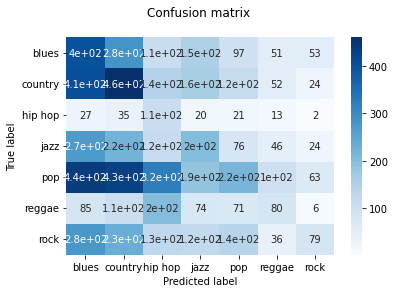

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred_kmeans_s)

# Only use the labels that appear in the data
classes = unique_labels(y_test, y_pred_kmeans_s)

df = pd.DataFrame(cm, index=classes, columns=classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation=0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

In [ ]:
#dividir el dataframe en dos para hacer testing y training

In [ ]:
#hacer subsampling u oversampling seegun sea necesario, para esto primero vemos la cantidad de vlaores unicos en el dataframe

In [ ]:
#aplicar alguna tecnica de clasificacion al data frame ya balanceado, la idea es aplicar mas de una

In [ ]:
#comparar los resultados de las tecnicas palicadas, esto puede hacerse mediante graficos o simplemente numeros

In [ ]:
#entregar finalmente el modelo de clasificacion ya seleccionado

In [167]:
df_tecnico["genre"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=object)

In [ ]:
##########################################################################################################################

In [ ]:
#tomar los atributos necesarios apra el data frame, lyrics y genero

In [ ]:
#pasar los ylrics a texto, tal como se hace el en lab 2.1

In [ ]:
#balancear los datos con alguna tecnica de subsamplig u oversampling

In [ ]:
#probar distintos modelos sobre los datos

In [ ]:
#elegir el mejor modelo y comprobar si es viable este metodo de clasificacion

##4. Propuesta experimental
Para la primera propuesta experimental, se debe generar un modelo de clasificador de generos basado en aspectos tenico de las canciones, donde los pasos a seguir seran lo siguientes:

1. Aplicar tecnicas de subsampling u oversampling par alograr un balance de los generos de las canciones
2. Generar modelos de clasificacion con Decision Tree, Knn y SVC, usando un modelo de entrenamiento 25/75
3. Evaluar los modelos mediante distintos parámetros evaluativos, siendo estos precission, recall y f1-score
4. Comparar desempeño de los modelos y concluir si el mejor modelo tiene un buen desempeño para responder la pregunta planteada(hay que plantear la pregunta). Vale decir, ver si el modelo clasifica las canciones de forma correcta tomando sus aspectos técnicos como base.

Para la segunda propuesta experimental, se debe generar un modelo de clasificador de generos basado en las letras de las canciones, donde los pasos a seguir seran lo siguientes:

1. Convertir las letras de las canciones en informacion numerica
2. Aplicar tecnicas de balanceamiento de datos
3. Generar modelos de clasificacion con Decision Tree, Knn y SVC, usando un modelo de entrenamiento 25/75
4. Evaluar los modelos mediante distintos parámetros evaluativos, siendo estos precission, recall y f1-score
5. Comparar desempeño de los modelos y concluir si el mejor modelo tiene un buen desempeño para responder la pregunta planteada(hay que plantear la pregunta). Vale decir, ver si el modelo clasifica las canciones de forma correcta tomando sus aspectos técnicos como base.

Para la tercera propuesta experimental, se debe generar un modelo de clustering y evaluarlo con una medida externa, que correspondería a las etiquetas conocidas de género. Por lo tanto, los pasos a seguir son:

1. Generar modelos de clustering con K-Means, DBSCAN y clustering aglomerativo, usando cantidad de clusters = 7.
3. Graficar representación PCA original de la data y comparar con la distribución PCA de los clusters de los modelos (visualmente).
2. Evaluar cada uno de los modelos con medida externa ("opinión experta"), utilizando la etiqueta de género conocida.
3. Comparar desempeños y concluir si el mejor modelo tiene un buen desempeño para responder la pregunta planteada. Vale decir, ver si el modelo predice que las canciones efectivamente son de su género etiquetado a partir del cluster asignado. Se estima que 80% de correctas calificaciones puede considerarse una buena proporción.


In [19]:
X=df[['release_date', 'len', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']]
X.head()

release_date  len  danceability  loudness  acousticness  instrumentalness  \
0          1950   95      0.357739  0.454119      0.997992          0.901822   
1          1950   51      0.331745  0.647540      0.954819          0.000002   
2          1950   24      0.456298  0.585288      0.840361          0.000000   
3          1950   54      0.686992  0.744404      0.083935          0.199393   
4          1950   48      0.291671  0.646489      0.975904          0.000246   

    valence    energy  
0  0.339448  0.137110  
1  0.325021  0.263240  
2  0.351814  0.139112  
3  0.775350  0.743736  
4  0.597073  0.394375

In [64]:
#KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=7, n_init=10, max_iter=300)
kmeans1.fit(X)
kmeans1.labels_
df["genre"]

0            pop
1            pop
2            pop
3            pop
4            pop
          ...   
28367    hip hop
28368    hip hop
28369    hip hop
28370    hip hop
28371    hip hop
Name: genre, Length: 28372, dtype: object

In [59]:
df_tecnico["genre"].unique()
dicc={"pop":0,"country":1,"blues":2,"jazz":3,"reggae":4,"rock":5,"hip hop":6}
values=df_tecnico["genre"].to_numpy()
values[0]=0
values

array([0, 0, 0, ..., 6, 6, 6], dtype=object)

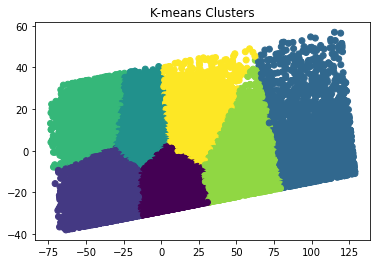

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(X)
new_X = pca.transform(X) 

plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans1.labels_)
plt.title("K-means Clusters")
plt.show()

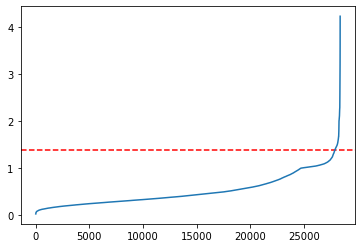

In [136]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

N = 10 #corresponde a 'min_samples'

nbrs = NearestNeighbors(n_neighbors=N).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=1.4, color='r', linestyle='--') #Ajuste el valor para y
plt.plot(distances);

In [156]:
dbscan2.labels_

array([-1,  0, -1, ...,  7,  7,  7], dtype=int64)

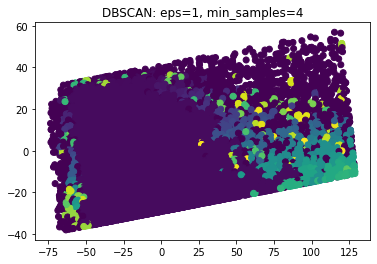

In [155]:
from sklearn.cluster import DBSCAN

eps = 1
N = 4


dbscan2 = DBSCAN(eps=eps, min_samples=N).fit(new_X)
plt.scatter(new_X[:,0], new_X[:,1], c=dbscan2.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={N}")
plt.show()

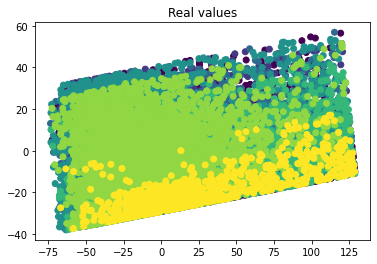

In [159]:

plt.scatter(new_X[:, 0], new_X[:, 1], c=values)
plt.title("Real values")
plt.show()

In [158]:
#DBSCAN

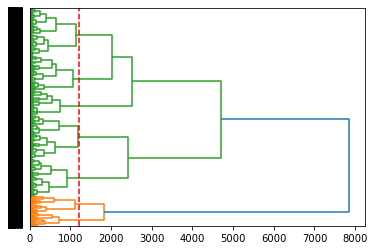

In [128]:
#Cluster Jerarquico

from scipy.cluster.hierarchy import dendrogram, linkage

plt.axvline(x=1200, color='r', linestyle='--')
Z = linkage(X, 'ward', metric='euclidean')
dn = dendrogram(Z, orientation='right')

In [130]:
complete_all2 = AgglomerativeClustering(linkage="ward", 
                                       affinity='euclidean', 
                                       n_clusters=None, 
                                       distance_threshold=1220).fit(X)

In [129]:
from sklearn.cluster import AgglomerativeClustering

complete_all1 = AgglomerativeClustering(linkage="ward", 
                                       affinity='euclidean', 
                                       n_clusters=7).fit(X)

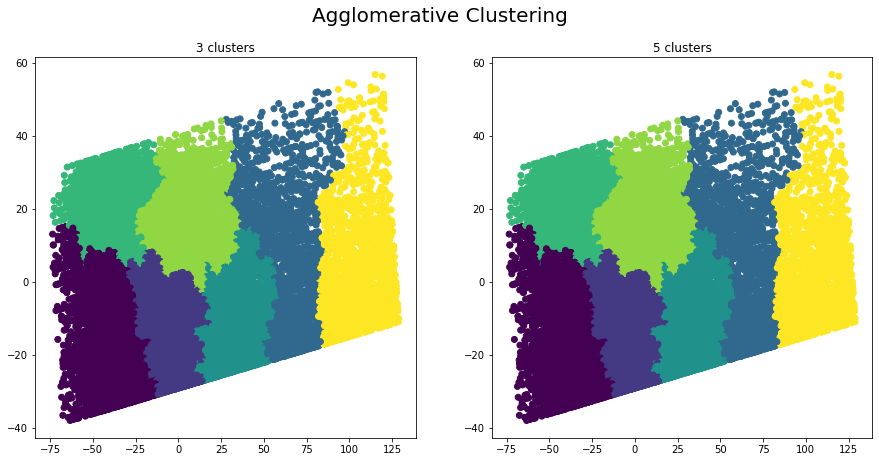

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(new_X[:, 0], new_X[:, 1], c=complete_all2.labels_)
ax1.set_title('3 clusters')
ax2.scatter(new_X[:, 0], new_X[:, 1], c=complete_all1.labels_)
ax2.set_title('5 clusters')
plt.suptitle("KMeans model vs Real values", fontsize=20)
plt.show()

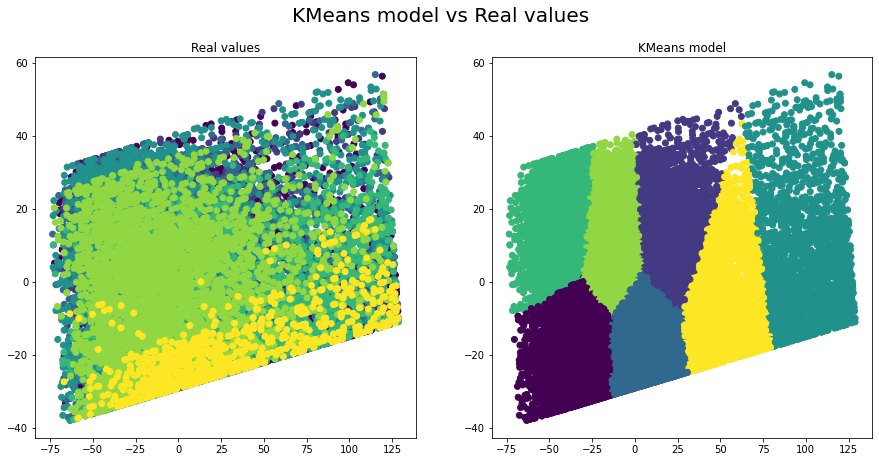

In [174]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(new_X[:, 0], new_X[:, 1], c=values)
ax1.set_title('Real values')
ax2.scatter(new_X[:, 0], new_X[:, 1], c=kmeans1.labels_)
ax2.set_title('KMeans model')
plt.suptitle("KMeans model vs Real values", fontsize=20)
plt.show()

In [165]:
from sklearn.metrics import silhouette_score
print("Dataset X K-Means 1\t", silhouette_score(X, kmeans1.labels_))

Dataset X K-Means 1	 0.3756041242456929


In [164]:
_filter_label = dbscan2.labels_ >= 0
print("Dataset X DBSCAN 2\t", silhouette_score(X[_filter_label], dbscan2.labels_[_filter_label]))

Dataset X DBSCAN 2	 -0.4067011455705064


In [166]:
print("Dataset X Clustering jerárquico\t", silhouette_score(X, complete_all1.labels_))

Dataset X Clustering jerárquico	 0.3222427722447676


##5. Contribuciones de integrantes
*   Adaptación de informe y edición de la introducción: Jules Fredes C.
*   Programación para exploración de datos: Benjamín Alvial
*   Formulación de preguntas y problemas: Benjamín Aguilar y Benjamín Alvial
*   Edición video: Diego Reyes
* Reformulación de preguntas y problemas: Benjamín Alvial
* Redacción propuesta experimental de clustering: Benjamín Alvial




In [ ]:
%%shell
jupyter nbconvert --to html ///gdrive/MyDrive/Colab Notebooks/Minería/data1950.csv Proyecto_Minería_Spotify_v4.ipynb

[NbConvertApp] WARNING | pattern '///gdrive/MyDrive/Colab' matched no files
[NbConvertApp] WARNING | pattern 'Notebooks/Minería/data1950.csv' matched no files
[NbConvertApp] WARNING | pattern 'Proyecto_Minería_Spotify_v4.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file

CalledProcessError: ignored